# Characterization of ArkA Segment 1 Binding to SH3 using Markov State Models

In [1]:
# GOAL : Conduct Markov Analysis on ArkAS1 Binding to SH3
# TICA : Lagtime = 2000
# KMeans : Clusters = 500

import pyemma as pe
import pyemma.plots as mplt
import pyemma.msm as msm
import numpy as np

# Prettify
%pylab inline
plt.style.use('default')
plt.rcParams['font.size'] = 16

Populating the interactive namespace from numpy and matplotlib


Loading in TICA components to check sampling of multiple discrete states. 

Text(0.5,0,'time ($\\mu$s)')

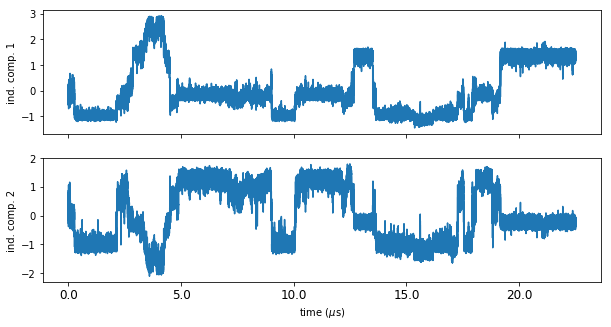

In [2]:
# Loading in TICA_output
Y2000 = np.load('./seg1_1/tica_seg1_1_complete_LAG_ACTUAL2000.npy')

# Setting x axis adjustors
current_x = [0, 500000, 1000000, 1500000, 2000000]
my_x = [i/100000 for i in current_x]

# Plotting TICA independent components
fig, (comp1, comp2) = plt.subplots(nrows=2, sharex=True, figsize = (10,5))
comp1.plot(Y2000[:,0])
comp1.set_ylabel('ind. comp. 1')
comp2.plot(Y2000[:,1])
comp2.set_ylabel('ind. comp. 2')

plt.xticks(current_x,my_x,size=12)
xlabel(r'time ($\mu$s)')

## Saving Figure
#savefig('./pictures/tica_LAG2000_ACTUAL.png', dpi=600)

Similarly to above; plotting TICA componenets as a free energy plot

Text(0.5,0,'TICA1')

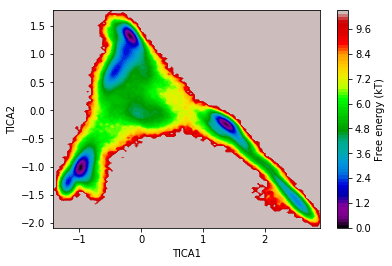

In [3]:
# Plotting free energy 
mplt.plot_free_energy(np.vstack(Y2000)[:,0], np.vstack(Y2000)[:,1])
ylabel('TICA2')
xlabel('TICA1')

#savefig('./pictures/markov_free_energy_STATE500_ACTUAL_NOBLACK.png', dpi=600)

TICA components clustered using Kmeans (500 clusters) and saved in script for speed. Trajectory file also loaded in for speed

In [4]:
# Loading in Cluster (kmeans)
cl = pe.load('./markov_gen_out/coorcluster_LAG2000_ACTUAL.h5', model_name='cluster500')

# Loading in Trajectory file
dtrajs = np.load('./markov_gen_out/coorcluster_LAG2000_ACTUAL500__NPARR.npy')
dtrajs = dtrajs[0]

In [5]:
####### Defining Lags and MSM iterations for error modeling

# lags = [1,2,5,10,20,50,100,200]
# its = msm.its(dtrajs, lags=lags, nits=10)
# bayes_its = msm.its(dtrajs, lags=lags, nits=10, errors='bayes')

####### Saving to accelerate process

fname = './markov_gen_out/MSM_LAG2000_Timescales.h5'
# its.save(file_name = fname, model_name='its', overwrite=True)
# its.save(file_name = fname, model_name='bayes_its', overwrite=True)

its = pe.load(fname, 'its')
bayes_its = pe.load(fname, 'bayes_its')

Bayesian error sampling to check statistical relevance of data. 

(0, 200)

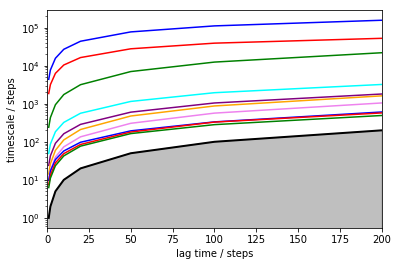

In [6]:
# Plotting implied timescales with Bayesian error sampling

mplt.plot_implied_timescales(bayes_its)
xlim(0,200)
#savefig('./pictures/bayes_error.png', dpi=600)

In [7]:
# Creating MSM
msm_lag = 100
M = msm.estimate_markov_model(dtrajs,lag = msm_lag)

Text(0,0.5,'TIC2 RC')

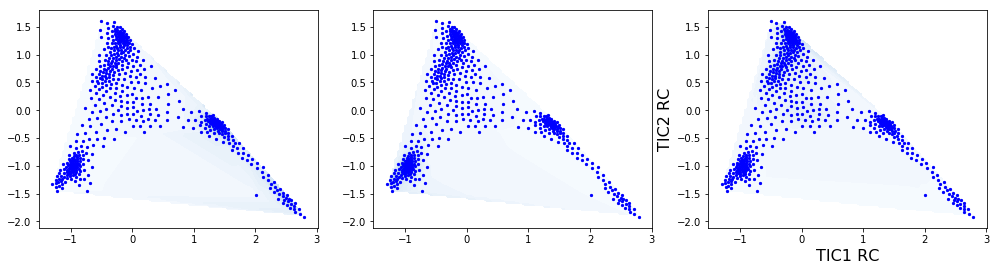

In [8]:
# Plotting Eigenvalues

# Defining cluster centers
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

# Running pcca on MSM
M.pcca(3)
pcca_sets_3 = M.metastable_sets
pcca_dist = M.metastable_distributions

# Plotting Eigenvalues for PCCA
f, (ax1,ax2,ax3) = subplots(ncols=3)
f.set_size_inches(17,4)
cmap=plt.cm.Blues
mplt.scatter_contour(cc_x, cc_y, pcca_dist[0], fig=f, ax=ax1, colorbar=False, cmap=cmap)
xlabel('TIC1 RC', fontsize = 16)
ylabel('TIC2 RC', fontsize = 16)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[1], fig=f, ax=ax2, colorbar=False, cmap=cmap)
xlabel('TIC1 RC', fontsize = 16)
ylabel('TIC2 RC', fontsize = 16)
mplt.scatter_contour(cc_x, cc_y, pcca_dist[2], fig=f, ax=ax3, colorbar=False, cmap=cmap)
xlabel('TIC1 RC', fontsize = 16)
ylabel('TIC2 RC', fontsize = 16)


In [9]:
# Sampling 50 frames from PCCA
pcca_samples = M.sample_by_distributions(pcca_dist, 50)

In [10]:
# Coarse graining states into 3
hmm = M.coarse_grain(3)

In [11]:
# Stationary Distributions of HMM
hmm.stationary_distribution

# Defining metastable sets for PCCA
pcca_sets = hmm.metastable_sets

In [12]:
# Useful Function to define

def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    print('avg[i]:', len(avg))
    print('sets:', len(sets))
    print('cc_x:', len(x))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

In [13]:
xavg = avg_by_set(cc_x, pcca_sets_3)
A = pcca_sets_3[xavg.argmax()]
B = pcca_sets_3[xavg.argmin()]


avg[i]: 3
sets: 3
cc_x: 500


In [14]:
xavg = avg_by_set(cc_x, pcca_sets)
#avgpos = np.zeros((3,2))
#avgpos[:,0] = avg_by_set(cc_x, pcca_sets)
#avgpos[:,1] = avg_by_set(cc_y, pcca_sets)

avg[i]: 3
sets: 3
cc_x: 500


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


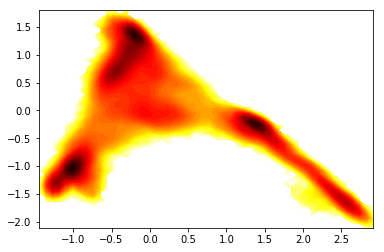

In [15]:
# histogram data             
z,x,y = np.histogram2d(Y2000[:,0],Y2000[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]                          
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)  

Text(0.5,0,'TICA1')

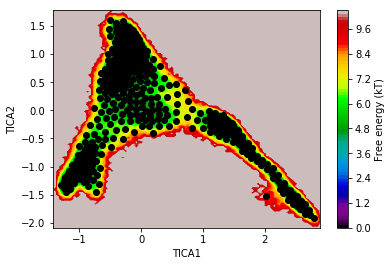

In [16]:
# Overlaying Free energy plot with coarse-grained states

mplt.plot_free_energy(np.vstack(Y2000)[:,0], np.vstack(Y2000)[:,1])
#plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
cols = ['purple', 'blue', 'green']

for i in range(3):
    scatter(cc_x[pcca_sets_3[i]], cc_y[pcca_sets_3[i]], color='black')

ylabel('TICA2')
xlabel('TICA1')
#savefig('./pictures/markov_free_energy_STATE500_COARSEGRAIN_ACTUAL_ALLBLACK.png', dpi=600, bbox_inches = 'tight')

In [17]:
# Saving trajectory files for each state

#coor.save_traj(inp, pcca_samples[0], './pcca0_50Gsamples_ACTUAL.nc') #saving trajectory files of each
#coor.save_traj(inp, pcca_samples[1], './pcca1_50Gsamples_ACTUAL.nc') #pcca component
#coor.save_traj(inp, pcca_samples[2], './pcca2_50Gsamples_ACTUAL.nc')

In [18]:
pcca_observation_prob = hmm.sample_by_observation_probabilities(50)

In [19]:
xavg = avg_by_set(cc_x, pcca_sets)
avgpos = np.zeros((3,2))
avgpos[:,0] = avg_by_set(cc_x, pcca_sets)
avgpos[:,1] = avg_by_set(cc_y, pcca_sets)
print(xavg)

avg[i]: 3
sets: 3
cc_x: 500
avg[i]: 3
sets: 3
cc_x: 500
avg[i]: 3
sets: 3
cc_x: 500
[ 1.67052031 -0.92807299 -0.17670771]


Markov Model generated. Curious - 1 and 0 do not have any transition probabilities between them. Seems like 2 may be a transition state that 1 has to pass through to get to 0.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'fig'
  s)


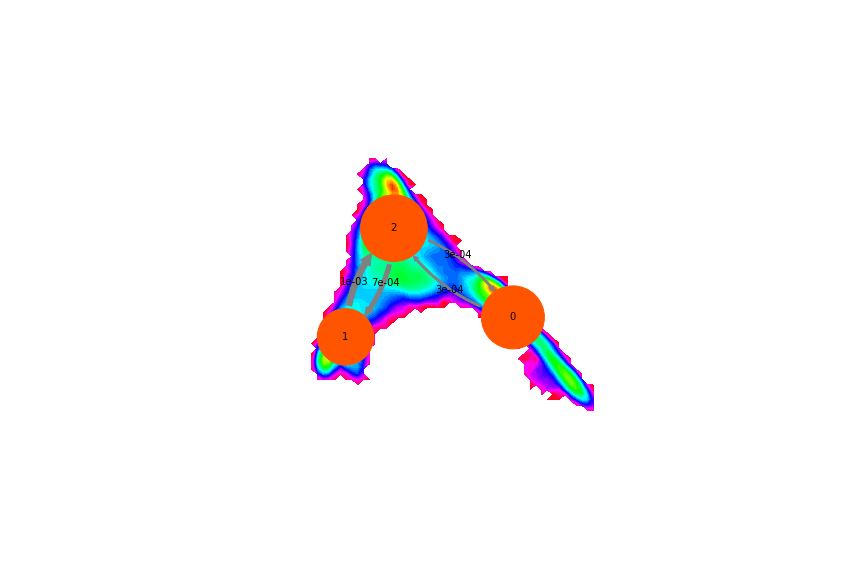

In [20]:
# Overlaying Markov model on Free energy diagram

fig, _ = mplt.plot_markov_model(hmm, avgpos, max_width=10, max_height=5, figpadding=2, state_scale=0.5, )
#gca().set_frame_on(False)
cf=contourf(F.T, 50, cmap=plt.cm.hsv, extent=extent, fig=fig, zorder=0) 
fig.set_size_inches(15, 10)
plt.rcParams['font.size'] = 10
#plt.savefig('./MSM2-3_ACTUAL.png', dpi = 600, bbox_inches = 'tight')

#cols = ['purple', 'magenta', 'red', 'yellow', 'blue', 'green',]
#for i in range(6):
#    scatter(cc_x[pcca_sets[i]], cc_y[pcca_sets[i]], color=cols[i], s=size)

In [21]:
# Checking state densities

print('pcca_0:', len(pcca_sets_3[0])/500)
print('pcca_1:', len(pcca_sets_3[1])/500)
print('pcca_2:', len(pcca_sets_3[2])/500)

pcca_0: 0.256
pcca_1: 0.23
pcca_2: 0.514
